In [10]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

statevector_sim = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    job = q.execute(circuit, backend=statevector_sim).result()
    statevec = job.get_statevector()
    
    n_qubits = circuit.num_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

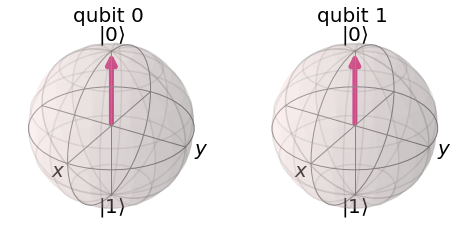

In [11]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

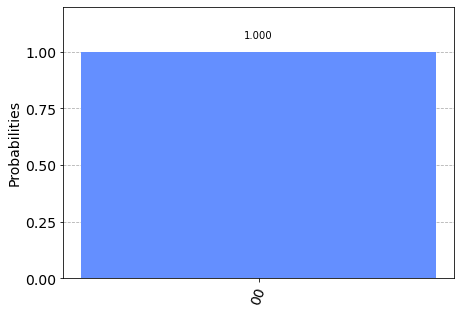

In [12]:
plot_histogram([counts])

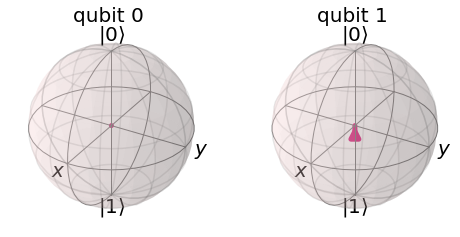

In [33]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

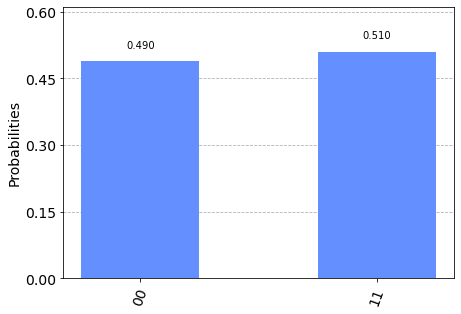

In [34]:
plot_histogram([counts])

In [35]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

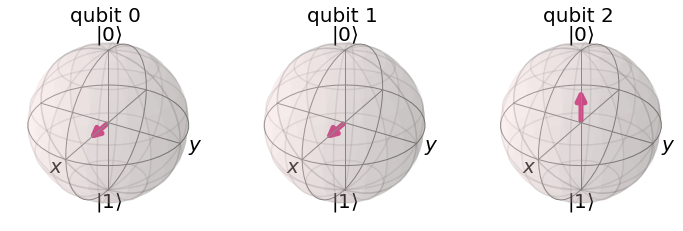

In [36]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

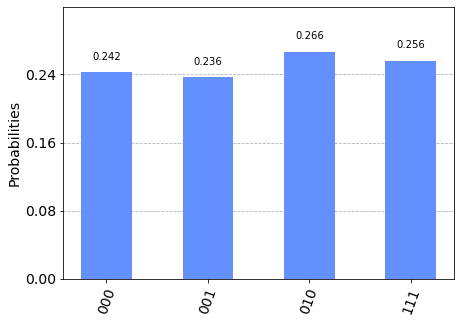

In [37]:
plot_histogram([counts])

In [38]:
circuit = q.QuantumCircuit(3, 1)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)

circuit.measure([2], [0])

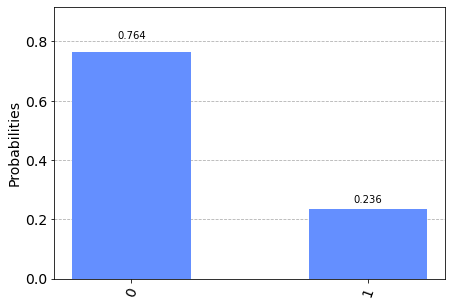

In [40]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()

plot_histogram([counts])

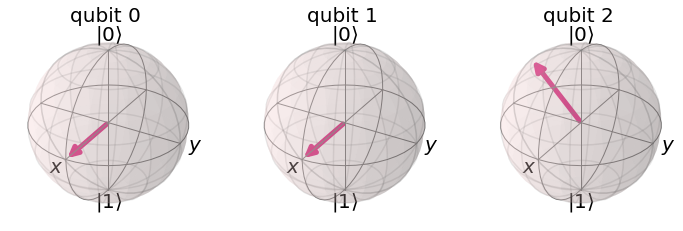

In [67]:
import math

circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
#circuit.ccx(0, 1, 2)
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

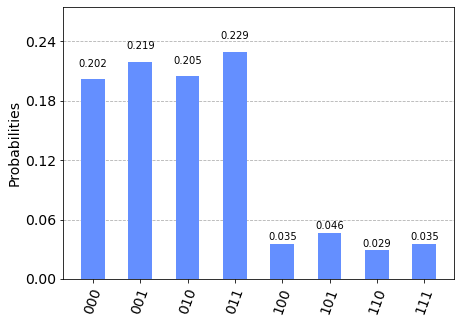

In [68]:
plot_histogram([counts])